# Your first Recurrent Neural Network (RNN)

🙌 Welcome to RNNs! After using CNNs in the previous lesson to deal with images (spatial data), you are going to deal with time-related data (***temporal data***).

🎯 Goals of this warm-up challenge:

1. Understand what temporal data is
2. Build your first Recurrent Neural Networks



## A Note on Google Colab

From now on, you no longer need to use Google Colab. There will be **no performance gains** from using it, as today's machines are powerful enough to tackle this challenge — especially if you're on a MacBook with an MX chip! 😉

Proceed with the challenge as you normally would with Jupyter Notebook (❌ Do not use Colab ❌)

Good luck! 🚀

## (1) 📚 The dataset

_Disclaimer: nothing to code by yourself in this section, read it carefully and run the cells. We want you to focus on the RNN and LSTM models, not some Pythonesque questions_ 😉

🔢 Imagine that we have access to some data about employees in a company.

In [1]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')


In [12]:
X.shape, y.shape


((25000, 10, 3), (25000,))

☝️ The dataset describes the evolution of the **employment status of 25 000 employees, year after year**: each sequence corresponds to 10 consecutive years, where each year describes a job situation, comprising 3 components
- the salary,
- the number of people under someone's responsibility,
- the size of the company. 

🕵🏻 To understand the dataset a bit better, let's look at the data of the first employee.

In [2]:
import pandas as pd

employee_0 = pd.DataFrame(X[0],
                          columns=['salary',
                                   'responsibility',
                                   'company_size'])
round(employee_0,2)


,salary,responsibility,company_size
0,0.80,10.73,102.0
1,0.50,10.73,102.0
2,0.60,10.73,102.0
3,0.71,10.73,130.0
4,0.94,10.73,130.0
5,1.05,10.73,130.0
6,1.12,32.00,108.0
7,4.87,32.00,108.0
8,4.97,33.00,108.0
9,5.20,39.00,108.0


🎯 The goal in this challenge is to predict the montly salary on the 11th year for each of these 25,000 employees, based on the past observations.

In [3]:
# For example, the first employee earns 6.499 k USD per month
# during the 11th year at the company
y[0]


6.499

📈 To help you get a better understanding about the evolution of the salaries, the number of people under their responsibility and the company size over the years, you can run the cell down below. Can you visually detect some correlations between these three variables?

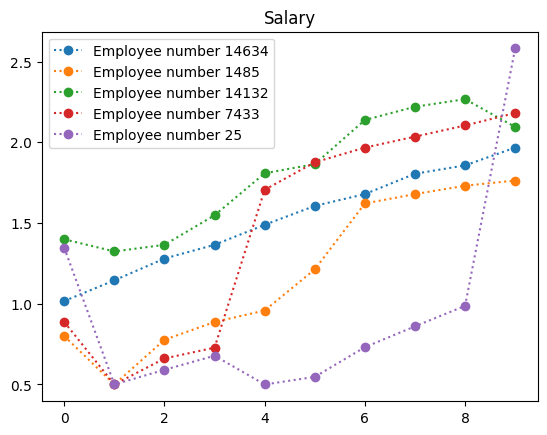

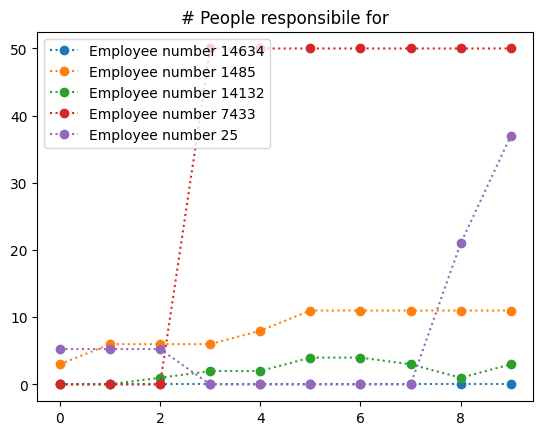

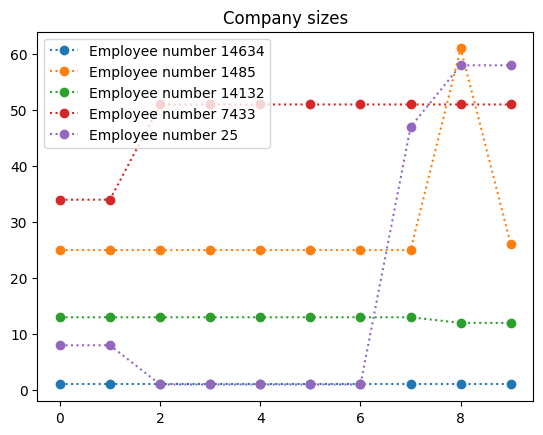

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

number_of_employees = len(X)

### Choosing random employees
##### As the employees are selected randomly, feel free to re-run this cell a few times !

number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0,
                                     number_of_employees,
                                     number_of_randomly_selected_employees)


### Plotting data for the selected employees

plt.title('Salary')
for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()


🕵🏻 **Data Exploration** 🕵🏻 Look at the distribution of:
* all the salaries during the 10th year, 
* people under someone's responsibility, 
* and the company sizes 

to get a better understanding of the variability of observations

/Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


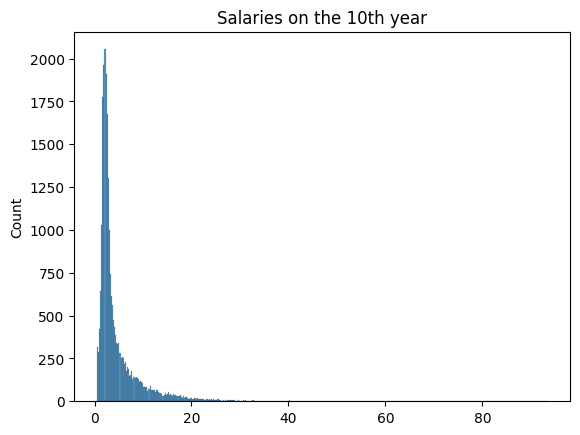

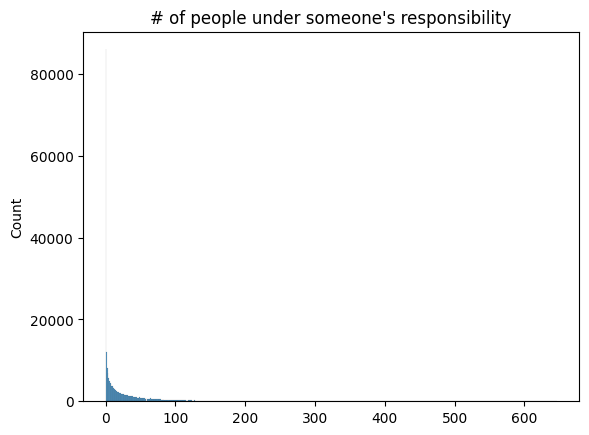

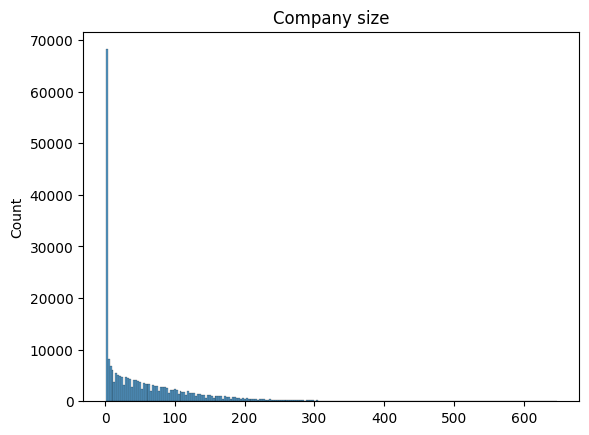

In [5]:
import seaborn as sns

plt.title("Salaries on the 10th year")
sns.histplot(X[:, -1, 0].flatten()) # all the employees, last year, feature #0 = salaries
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten()) # all the employees, all the years, feature #1 = responsabilities
plt.show()

plt.title("Company size")
sns.histplot(X[:, :, 2].flatten()) # all the employees, all the years, feature #2 = company size
plt.show()


✂️ **Hold-out method** Let's split the dataset in a train and test set (80/20)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Notice that we are train_test_splitting the 25 000 employees!

print(X_train.shape, y_train.shape)


(20000, 10, 3) (20000,)


## (2) 💻 A Simple RNN

🤗 Now that you are familiar with this company's dataset, you will create your first Recurrent Neural Network. Let's start with a simple architecture.

❓ **Question** ❓ Write a model that has: 
- a ***Normalization*** layer adapted to the training set
- a ***SimpleRNN*** layer with 20 *units* (don't forget that `tanh` is better suited as an activation function for a Recurrent Layer)
- a ***Dense*** layer with 10 neurons
- a ***Dense*** layer specific to your task (= to ***predict*** a salary)

👩🏻‍🏫 <u>Remember</u>: You don't need to specify an `input_shape`: as soon as your Normalizer has been adapted to your train set, it has memorized the input shape!

In [7]:
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten


2023-11-16 10:26:26.703553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# YOUR CODE HERE
# Model with a Normalization layer and
# a SimpleRNN layer with 20 units with tanh activation and
# a Dense output layer with 10 neurons and
# a Dense output layer with 1 neuron, to predict the salary


model = Sequential([
    Normalization(input_shape=(10, 3)),
    SimpleRNN(20, activation='tanh'),
    Dense(10, activation='relu'),
    Dense(1)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 10, 3)             7         
 on)                                                             
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 708 (2.77 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________


❓ **Question**: How many trainable parameters does your RNN have ❓

In [11]:
# YOUR CODE HERE

# Trainable Parameters
count_params = (20 * 20) + (20 * 3) + (20 * 1) + (10 * 20) + 10 + (10 * 1) + 1
print("Trainable Parameters: ", count_params)


Trainable Parameters:  701


❓ **Question** ❓ Try to recompute the number of parameters manually.


> YOUR ANSWER HERE

<details>
    <summary><i>Answer</i></summary>


- <u> Normalization Layer</u>: 
    - This layer has $\color{red}{n_x = 3} $ features (salary, responsibility, company size) to normalize. Each of them requires to compute the <font color=blue>_mean_</font>  and the <font color=blue>_standard_deviation_</font>. So we have $\color{red}{n_x = 3} \times \color{blue}{2} = 6$ non-trainable parameters. The 7th parameter is a bias initially set to 0.

- <u> Recurrent Layer</u>: 
    - If $\color{green}{n_h = 20} $ RNN units are applied in parallel to $\color{red}{n_x = 3} $ features, then the Recurrent Layer has $\color{green}{n_h}(\color{green}{n_h} + \color{red}{n_x} + 1) = \color{green}{20} \times (\color{green}{20}+\color{red}{3}+1) = \color{green}{20} \times 24 = 480$ parameters to train.
    - Notice how this number is *independent* of the length of each sequence (here 10 days)
    
- <u> Dense Layer</u>: 
    - Starting with $\color{green}{n_h = 20} $ RNN units and $1$ bias, using 10 neurons, the Dense Layer has $ (\color{green}{20}+1) \times 10 = 21 \times 10 = 210$ parameters
    
- <u> Predictive Dense Layer</u>: 
    - Starting with $10$ neurons and $1$ bias, using 1 neuron to predict the 11th salary, the Predictive Dense Layer has $ (10+1) \times 1 = 11 \times 1 = 11$ parameters
    
</details>    

❓ **Question** ❓ Compile your model. For RNN, we recommend you to use the ***rmsprop*** optimizer (instead of *adam*).

In [14]:
# YOUR CODE HERE
# Compile the model with rmsprop optimizer and mse loss
model.compile(optimizer='rmsprop', loss='mse')


❓ **Questions** ❓ 

* Train your model on your training dataset:
    * use a Validation Split of 20%
    * and an Early Stopping Criterion with patience $= 5 $
* Evaluate your performance on the test set

In [15]:
# YOUR CODE HERE
# Train the model with validation split 0.2 and 100 epochs
# and EarlyStopping with patience 5
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5)

history = model.fit(
    X_train, y_train, validation_split=0.2, epochs=100,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
model.evaluate(X_test, y_test)


Epoch 1/100
500/500 [==============================] - 2s 3ms/step - loss: 23.4455 - val_loss: 18.6542
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 12.0799 - val_loss: 10.9932
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 7.2767 - val_loss: 6.9200
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 5.1990 - val_loss: 6.2528
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 4.0195 - val_loss: 4.3056
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 3.6005 - val_loss: 4.0041
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 3.2210 - val_loss: 3.2189
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 3.1247 - val_loss: 3.9396
Epoch 9/100
500/500 [==============================] - 1s 2ms/step - loss: 2.8994 - val_loss: 4.1871
Epoch 10/100
500/500 [==============================] - 1s 2ms/step - loss: 2.7413 - va

1.218929648399353

## (3) 💻 Baseline comparison

> ❗️ **Important reminder** ❗️ 
>  
> ***Always remember to compare your Deep Learning models, and more generally any Machine Learning model, to a baseline model.***

🧑🏻‍🏫 Remember that our goal is to predict the salary of the employees for the 11th year. It is a ***Regression task***. What baseline could we build? 
1. In the case of a traditional regression model, a baseline prediction for `y_test` is  to **predict the average of `y_train`**... but this option could be irrelevant for time-related series. Theoretically, someone's salary is supposed to increase over the years!
2. An alternative baseline prediction for a regression task is to **predict the last seen value**

❓ **Questions** ❓ 
* Compute the Mean Absolute Error of a baseline model that predicts that the salary remains constant between the 10-th and 11-th year
* Compare this baseline model to your RNN

In [18]:
# YOUR CODE HERE
# Create a Baseline model to the same task
# and compute the Mean Absolute Error that predicts that
# the salary remains constant between 10th and 11th year

from sklearn.metrics import mean_absolute_error

y_pred = np.full(y_test.shape, y_train.mean())
mae_baseline = mean_absolute_error(y_test, y_pred)
print("Baseline MAE: ", mae_baseline)


Baseline MAE:  3.56282759408


👉 If you are stuck with this question, try `(4) LSTM` and come back to this afterwards.

🧑🏻‍🏫 Ask a TA if needed. Look at the answer only if you already tried to answer these questions unsuccessfully.

<details>
    <summary><i>Answer</i></summary>


```python
def constant_prediction(X, y):
    errors = []
    for xx, yy in zip(X, y):
        last_salary = xx[-1][0]        # Using the 10th salary to predict the 11th salary
        errors.append(yy - last_salary)
        
    return errors    
```
    
</details>    

😁 You should notice that your RNN performs a bit better than a baseline model.

## (4) 💻 LSTM: Long-Short Term Memory

❓ **Questions** ❓ 

* Write the exact same model, but with a `LSTM` layer instead of a `SimpleRNN` layer
* Evaluate your performance on the test set

In [19]:
# YOUR CODE HERE
# Create the exact same model as before with LTSM layer instead of SimpleRNN
# and compare the results

from tensorflow.keras.layers import LSTM

model = Sequential([
    Normalization(input_shape=(10, 3)),
    LSTM(20, activation='tanh'),
    Dense(10, activation='relu'),
    Dense(1)
])

model.summary()

model.compile(optimizer='rmsprop', loss='mse')

early_stopping = EarlyStopping(patience=5)

history = model.fit(
    X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping]
)

model.evaluate(X_test, y_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 10, 3)             7         
 tion)                                                           
                                                                 
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2148 (8.39 KB)
Trainable params: 2141 (8.36 KB)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________
Epoch 1/100
500/500 [==============================] - 3s 4ms/step - loss: 26.1812 - va

0.8932670950889587

In [22]:
# Predict salary on the 11the year for all the employees
y_pred = model.predict(X_test)
print(y_pred.shape)

# Compute the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("MAE: ", mae)


157/157 [==============================] - 0s 1ms/step
(5000, 1)
MAE:  0.4149525704290867


💪 The LSTM should perform a bit better than the SimpleRNN with a lower MAE.

🏁 Congratulations! You know how to train a RNN on sequential data.
 

💾 Do not forget to git add/commit/push your notebook...

🚀 ... and move to the next challenge!

---

<u>Note</u>: The sequences you worked with are totally fake. In case, you need to train and reproduce similar data, you can find below the functions that have been used to simulate such a dataset.

## 🛠 (Utils)

In [20]:
def create_sequences(number):
    X, y = [], []

    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)

    return np.array(X), np.array(y)

def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []


    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length

    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)

    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)


    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)

        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]

    return np.array([salaries, nb_persons, company_sizes]).T, y


In [ ]:
#X, y = create_sequences(25000)

#np.save('X', X.astype(np.float32))
#np.save('y', y)
